# Inferring The Covariance Of A Multivariate Normal Distribution With Inverse Wishart Prior And Known Mean

In [1]:
# this method creates random symmetric positive definite matrices
from sklearn.datasets import make_spd_matrix
import numpy as np

In [2]:
# The data dimension is D. In other words, the number of features is D
D = 50
# The random generator is defined
rng = np.random.default_rng(seed=65567)
# The mean of the multivariate normal (MVN) distribution is generated
mean = rng.random(D)
# The covariance matrix of the MVN is generated
cov = make_spd_matrix(D, random_state=63254)
# The eigenvalues of the actual covariance matrix
eigvals_cov = np.linalg.eigvals(cov)
# The condition number of the actual eigenvalue matrix
cond_actual = np.linalg.cond(cov)

In [3]:
def estimates(X, N, mean, the_lambda):
    # The MLE for the covariance matrix is computed
    cov_mle = (np.matmul((X-mean).T, (X-mean))) / N
    # Eigenvalues of the MLE for the covariance matrix is computed
    eigvals_mle = np.linalg.eigvals(cov_mle)
    # The condition number of the MLE for the covariance matrix is computed 
    cond_mle = np.linalg.cond(cov_mle)

    # The scale matrix for the prior is computed
    S0 = np.diag(np.diag(cov_mle))
    # A parameter for the computation of the MAP estimate
    N0 = (the_lambda*N)/(1-the_lambda)
    # The MAP estimate for the covariance matrix
    cov_map = the_lambda*(S0/N0)+(1-the_lambda)*cov_mle
    # Eigenvalues of the MAP estimate for the covariance matrix
    eigvals_map = np.linalg.eigvals(cov_map)
    # The condition number of the MAP estimate for the covariance matrix is computed 
    cond_map = np.linalg.cond(cov_map)

    return cov_mle, eigvals_mle, cond_mle, cov_map, eigvals_map, cond_map

In [4]:
the_lambda = 0.9

N1 = 25
# Samples from the MVN distribution are generated
X = rng.multivariate_normal(mean=mean, cov=cov, size=N1)
cov_mle_1, eigvals_mle_1, cond_mle_1, cov_map_1, eigvals_map_1, cond_map_1 = estimates(X, N1, mean, the_lambda)
print("condition number of the actual covariance matrix is {:.3f}".format(cond_actual))
print("condition number of the MLE for the covariance matrix for {} samples is {:.3e}".format(N1, cond_mle_1))
print("condition number of the MAP estimate for the covariance matrix for {} samples is {:.3f}".format(N1, cond_map_1))

condition number of the actual covariance matrix is 2896.150
condition number of the MLE for the covariance matrix for 25 samples is 4.487e+18
condition number of the MAP estimate for the covariance matrix for 25 samples is 2969.748


In [5]:
N2 = 50
# Samples from the MVN distribution are generated
X = rng.multivariate_normal(mean=mean, cov=cov, size=N2)
cov_mle_2, eigvals_mle_2, cond_mle_2, cov_map_2, eigvals_map_2, cond_map_2 = estimates(X, N2, mean, the_lambda)
print("condition number of the actual covariance matrix is {:.3f}".format(cond_actual))
print("condition number of the MLE for the covariance matrix for {} samples is {:.3e}".format(N2, cond_mle_2))
print("condition number of the MAP estimate for the covariance matrix for {} samples is {:.3f}".format(N2, cond_map_2))

condition number of the actual covariance matrix is 2896.150
condition number of the MLE for the covariance matrix for 50 samples is 1.265e+06
condition number of the MAP estimate for the covariance matrix for 50 samples is 2656.586


In [6]:
N3 = 100
# Samples from the MVN distribution are generated
X = rng.multivariate_normal(mean=mean, cov=cov, size=N3)
cov_mle_3, eigvals_mle_3, cond_mle_3, cov_map_3, eigvals_map_3, cond_map_3 = estimates(X, N3, mean, the_lambda)
print("condition number of the actual covariance matrix is {:.3f}".format(cond_actual))
print("condition number of the MLE for the covariance matrix for {} samples is {:.3e}".format(N3, cond_mle_3))
print("condition number of the MAP estimate for the covariance matrix for {} samples is {:.3f}".format(N3, cond_map_3))

condition number of the actual covariance matrix is 2896.150
condition number of the MLE for the covariance matrix for 100 samples is 5.988e+03
condition number of the MAP estimate for the covariance matrix for 100 samples is 2280.464


In [7]:
import matplotlib.pyplot as plt

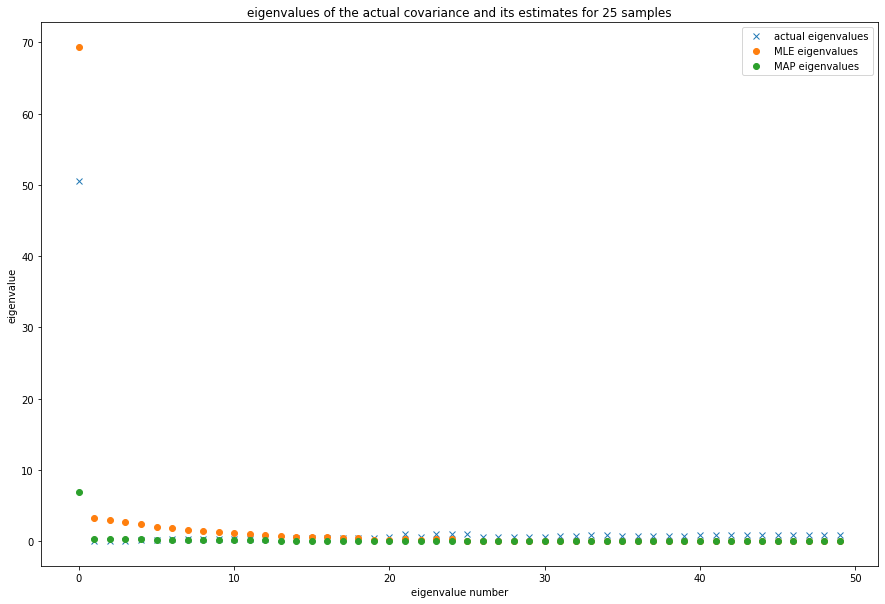

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(eigvals_cov, 'x', label='actual eigenvalues')
_ = ax.plot(eigvals_mle_1.real, 'o', label='MLE eigenvalues')
_ = ax.plot(eigvals_map_1.real, 'o', label='MAP eigenvalues')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('eigenvalues of the actual covariance and its estimates for {} samples'.format(N1))
_ = plt.xlabel('eigenvalue number')
_ = plt.ylabel('eigenvalue') 

In [9]:
# Mean squared error between the eigenvalues of the actual covariance and its MLE
mse_mle = np.sqrt(((eigvals_cov-eigvals_mle_1.real)*(eigvals_cov-eigvals_mle_1.real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MLE for {} samples is {:.3f}".format(N1, mse_mle))
# Mean squared error between the eigenvalues of the actual covariance and its MAP estimate
mse_map = np.sqrt(((eigvals_cov-eigvals_map_1.real)*(eigvals_cov-eigvals_map_1.real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for {} samples is {:.3f}".format(N1, mse_map))

# Mean squared error between the eigenvalues of the actual covariance and its MLE
mse_mle = np.sqrt(((eigvals_cov[1:]-eigvals_mle_1[1:].real)*(eigvals_cov[1:]-eigvals_mle_1[1:].real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MLE for {} samples is {:.3f}, the largest eigenvalue discarded".format(N1, mse_mle))
# Mean squared error between the eigenvalues of the actual covariance and its MAP estimate
mse_map = np.sqrt(((eigvals_cov[1:]-eigvals_map_1[1:].real)*(eigvals_cov[1:]-eigvals_map_1[1:].real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for {} samples is {:.3f}, the largest eigenvalue discarded".format(N1, mse_map))

The square root of the mse between the eigenvalues of the actual covariance and its MLE for 25 samples is 2.872
The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for 25 samples is 6.201
The square root of the mse between the eigenvalues of the actual covariance and its MLE for 25 samples is 1.101, the largest eigenvalue discarded
The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for 25 samples is 0.626, the largest eigenvalue discarded


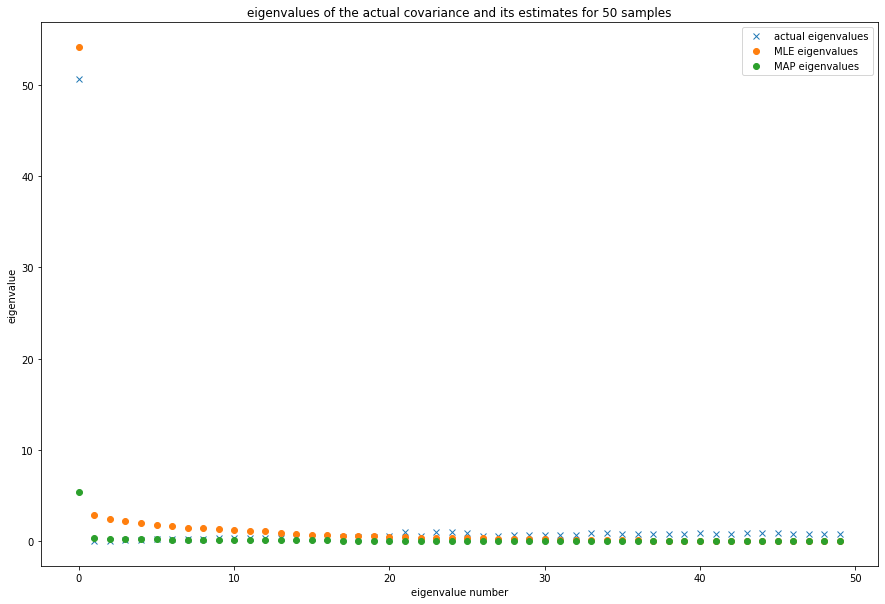

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(eigvals_cov, 'x', label='actual eigenvalues')
_ = ax.plot(eigvals_mle_2.real, 'o', label='MLE eigenvalues')
_ = ax.plot(eigvals_map_2.real, 'o', label='MAP eigenvalues')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('eigenvalues of the actual covariance and its estimates for {} samples'.format(N2))
_ = plt.xlabel('eigenvalue number')
_ = plt.ylabel('eigenvalue') 

In [11]:
# Mean squared error between the eigenvalues of the actual covariance and its MLE
mse_mle = np.sqrt(((eigvals_cov-eigvals_mle_2.real)*(eigvals_cov-eigvals_mle_2.real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MLE for {} samples is {:.3f}".format(N2, mse_mle))
# Mean squared error between the eigenvalues of the actual covariance and its MAP estimate
mse_map = np.sqrt(((eigvals_cov-eigvals_map_2.real)*(eigvals_cov-eigvals_map_2.real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for {} samples is {:.3f}".format(N2, mse_map))

# Mean squared error between the eigenvalues of the actual covariance and its MLE
mse_mle = np.sqrt(((eigvals_cov[1:]-eigvals_mle_2[1:].real)*(eigvals_cov[1:]-eigvals_mle_2[1:].real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MLE for {} samples is {:.3f}, the largest eigenvalue discarded".format(N2, mse_mle))
# Mean squared error between the eigenvalues of the actual covariance and its MAP estimate
mse_map = np.sqrt(((eigvals_cov[1:]-eigvals_map_2[1:].real)*(eigvals_cov[1:]-eigvals_map_2[1:].real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for {} samples is {:.3f}, the largest eigenvalue discarded".format(N2, mse_map))

The square root of the mse between the eigenvalues of the actual covariance and its MLE for 50 samples is 1.079
The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for 50 samples is 6.416
The square root of the mse between the eigenvalues of the actual covariance and its MLE for 50 samples is 0.963, the largest eigenvalue discarded
The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for 50 samples is 0.618, the largest eigenvalue discarded


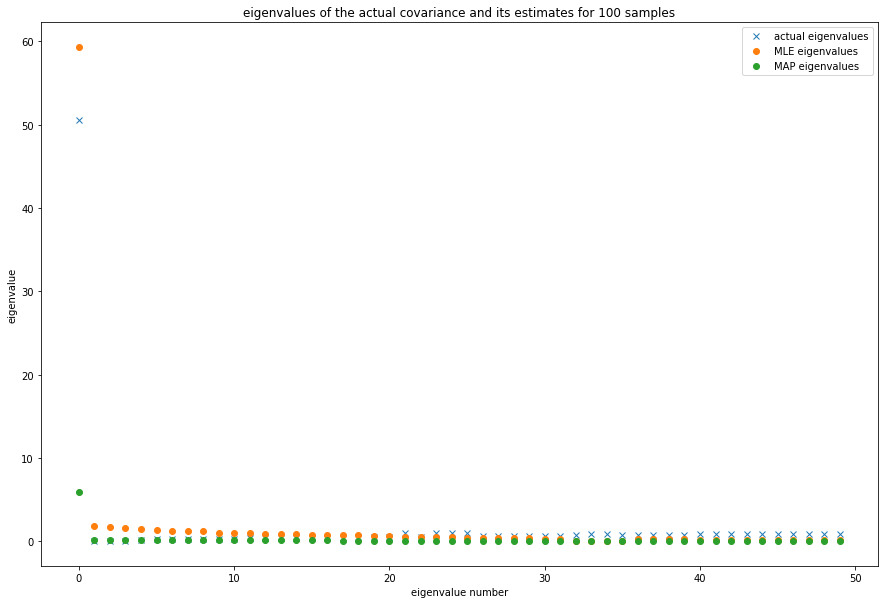

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(eigvals_cov, 'x', label='actual eigenvalues')
_ = ax.plot(eigvals_mle_3.real, 'o', label='MLE eigenvalues')
_ = ax.plot(eigvals_map_3.real, 'o', label='MAP eigenvalues')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('eigenvalues of the actual covariance and its estimates for {} samples'.format(N3))
_ = plt.xlabel('eigenvalue number')
_ = plt.ylabel('eigenvalue') 

In [13]:
# Mean squared error between the eigenvalues of the actual covariance and its MLE
mse_mle = np.sqrt(((eigvals_cov-eigvals_mle_3.real)*(eigvals_cov-eigvals_mle_3.real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MLE for {} samples is {:.3f}".format(N3, mse_mle))
# Mean squared error between the eigenvalues of the actual covariance and its MAP estimate
mse_map = np.sqrt(((eigvals_cov-eigvals_map_3.real)*(eigvals_cov-eigvals_map_3.real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for {} samples is {:3f}".format(N3, mse_map))

# Mean squared error between the eigenvalues of the actual covariance and its MLE
mse_mle = np.sqrt(((eigvals_cov[1:]-eigvals_mle_3[1:].real)*(eigvals_cov[1:]-eigvals_mle_3[1:].real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MLE for {} samples is {:.3f}, the largest eigenvalue discarded".format(N3, mse_mle))
# Mean squared error between the eigenvalues of the actual covariance and its MAP estimate
mse_map = np.sqrt(((eigvals_cov[1:]-eigvals_map_3[1:].real)*(eigvals_cov[1:]-eigvals_map_3[1:].real)).mean())
print("The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for {} samples is {:3f}, the largest eigenvalue discarded".format(N3, mse_map))

The square root of the mse between the eigenvalues of the actual covariance and its MLE for 100 samples is 1.443
The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for 100 samples is 6.342661
The square root of the mse between the eigenvalues of the actual covariance and its MLE for 100 samples is 0.747, the largest eigenvalue discarded
The square root of the mse between the eigenvalues of the actual covariance and its MAP estimate for 100 samples is 0.611077, the largest eigenvalue discarded


## Conclusion
From the results of the above computations, it is observed that the MAP estimate for the covariance matrix is always well-conditioned. MLE of the covariance matrix is very ill-conditioned for the case when the number of samples is less than the dimension, the number of features. As the number of samples increases, the conditioning of the MLE gets better. However, for small sample sizes, MLE condition number is always greater then the MAP estimate condition number. As to the eigenvalues, the MAP estimate cannot approximate the first eigenvalue, i.e. the largest eigenvalue, better than the MAP estimate. However, the MAP estimate approximations for the other eigenvalues are better than those of the MLE.

## References
The Posterior For The Covariance Of A Multivariate Normal Distribution With Inverse Wishart Prior And Known Mean, <https://saffetgokcensen.github.io/blog/2020/11/26/the-posterior-for-the-covariance-of-a-multivariate-normal-distribution-with-inverse-wishart-prior-and-known-mean>
